<h1>一、概念</h1>

    命令模式：将“请求”封装成对象，以便使用不同的请求、队列或者日志来参数化其他对象。命令模式也支持可撤销的操作。
    角色：
     1、命令(Command)：为所有命令声明了一个接口。调用命令对象的 execute()方法，就可以让接收者进行相关的操作。这个接口也具备一个 undo() 方法。
     2、具体命令(ConcreteCommand)：实现命令接口，定义了动作和接收者之间的绑定关系。调用者只要调用 execute() 就可以发出请求，然后由 ConcreteCommand 调用接收者的一个或多个动作。
     3、请求者(Invoker)：持有一个命令对象，有一个行动方法，在某个时间点调用命令对象的 execute() 方法，将请求付诸实行。
     4、接收者(Receiver)：接收者知道如何进行必要的动作，实现这个请求。任何类都可以当接收者。
     5、客户端(Client)：创建一个具体命令(ConcreteCommand)对象并确定其接收者，包括把其他角色串连在一起。

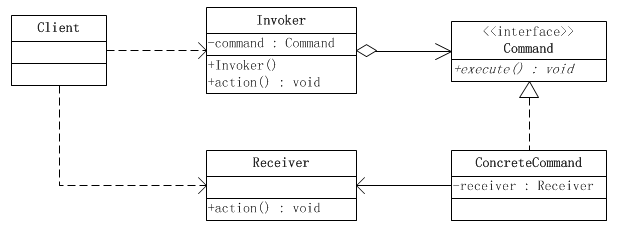

In [4]:
class Wizard():
    def __init__(self,src,rootdir):
        
        self.choices = []
        self.rootdir = rootdir
        self.src = src
    
    def preferences(self, command):
        self.choices.append(command)
    
    def execute(self):
        for choice in self.choices:
            if list(choice.values())[0]:
                print("copying binaries -- ", self.src, " to ", self.rootdir)
            else:
                print("No operation")
                
                
wizard = Wizard('python3.6.gzip', '/usr/bin/')
wizard.preferences({'python':True})
wizard.preferences({'java':False})
wizard.execute()

copying binaries --  python3.6.gzip  to  /usr/bin/
No operation


In [8]:
from abc import ABCMeta, abstractmethod
class Command(metaclass=ABCMeta):
    def __init__(self, recv):
        self.recv = recv
    def execute(self):
        pass

class ConcreteCommand(Command):
    def __init__(self, recv):
        super().__init__(recv)
    def execute(self):
        self.recv.action()

class Receiver:
    def action(self):
        print("Receiver Action")

class Invoker:
    def command(self, cmd):
        self.cmd = cmd
        
    def execute(self):
        self.cmd.execute()

recv = Receiver()
cmd = ConcreteCommand(recv)
invoker = Invoker()
invoker.command(cmd)
invoker.execute()
        
            

Receiver Action


In [2]:
from abc import ABCMeta, abstractmethod
class Order(metaclass=ABCMeta):    
    @abstractmethod
    def execute(self):
        pass

class BuyStockOrder(Order):
    def __init__(self, stock):
        self.stock = stock
    def execute(self):
        self.stock.buy()

class SellStockOrder(Order):
    def __init__(self, stock):
        self.stock = stock
    def execute(self):
        self.stock.sell()

class StockTrade:
    def buy(self):
        print("You will buy stocks")
    def sell(self):
        print("You will sell stocks")
        
class Agent:
    def __init__(self):
        self.__orderQueue = []
    def PlaceOrder(self, order):
        self.__orderQueue.append(order)
        order.execute()

stock = StockTrade()
buyStock = BuyStockOrder(stock)
sellStock = SellStockOrder(stock)
agent = Agent()
agent.PlaceOrder(buyStock)
agent.PlaceOrder(sellStock)

You will buy stocks
You will sell stocks
